### Proyecto Integrador: Predicción de Precios de Automóviles

Objetivo General del Proyecto

El objetivo de este proyecto es desarrollar dos modelos predictivos a partir de un conjunto de datos de automóviles:

1. Modelo de Clasificación: Identificar vehículos de gama alta y baja utilizando la mediana del precio como punto de corte.
2. Modelo de Regresión: Predecir el precio de los vehículos basándonos en sus características técnicas.

El mercado automotor presenta diferencias significativas entre regiones, por lo que es crucial que las automotrices comprendan las particularidades de los vehículos disponibles en cada mercado. A través de un análisis exhaustivo de los datos, buscamos identificar patrones clave que permitan a una automotriz china ajustar su estrategia de entrada y posicionamiento en el mercado local, optimizando su oferta para satisfacer la demanda y preferencias de los consumidores.

### **1. Análisis Exploratorio de Datos (EDA)**

EDA, es una etapa crucial en la cual se busca comprender la estructura y descubrir patrones en los datos, así como las relaciones entre variables.

En este caso, voy a explorar el conjunto de datos llamado ML_cars.csv. 

Durante esta fase, utilizare diferentes visualizaciones y técnicas para identificar tendencias y extraer información valiosa.

#### Importar librerías

In [35]:
import pandas as pd #Librería para manipulación y análisis de datos.
import numpy as np #Librería para operaciones matriciales y numéricas en Python. 
import matplotlib.pyplot as plt #Parte de Matplotlib, es una librería para crear visualizaciones estáticas, animadas e interactivas en Python.
import seaborn as sns #Basada en Matplotlib, es una librería de visualización de datos estadísticos.
import warnings #Librería estándar de Python que gestiona advertencias durante la ejecución del código.
import inflection #Librería para convertir entre distintos estilos de nombres de variables
import re  # La biblioteca re en Python se utiliza para trabajar con expresiones regulares, herramientas poderosas para buscar y manipular cadenas de texto.
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode #Biblioteca de Python para matemáticas, ciencia e ingeniería
from wordcloud import WordCloud #Biblioteca para crear nubes de palabras en Python
from collections import Counter #Es una clase que facilita el conteo de elementos en una colección

# Ignorar las advertencias de Seaborn
warnings.filterwarnings("ignore")

#### Cargar y visializar los datos.

In [36]:
cars = pd.read_csv('./ML_cars.csv')  # Carga los datos
print("* Los datos fueron cargados correctamente.")
print("- - " * 11)
# Muestra los primeros 5 registros del dataframe
print("* Primeros 5 registros del dataset:")
cars.head()

* Los datos fueron cargados correctamente.
- - - - - - - - - - - - - - - - - - - - - - 
* Primeros 5 registros del dataset:


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [37]:
# Muestra el tamaño del dataset
print(f"* El dataset tiene {cars.shape[0]} filas y {cars.shape[1]} columnas.")

* El dataset tiene 205 filas y 26 columnas.


Descripción de las Variables

A continuación, presento el diccionario de datos que detalla los nombres de las variables y proporciona una breve descripción de cada una. Este diccionario me permitirá comprender mejor los datos con los que estaré trabajando.

![DiccionarioDatos](https://github.com/jdeiloff/Proyecto-Integrador-M6/raw/main/dic_pi2.jpg)


**Análisis Descriptivo**

Ahora que he cargado correctamente los datos, procedo a realizar una exploración inicial para entender mejor su estructura y evaluar la calidad de la información. Para ello, llevaré a cabo los siguientes pasos:

- Tipos de datos: Verificaré los tipos de cada columna, identificando cuáles son numéricas y cuáles categóricas.
- Valores faltantes o nulos: Identificaré si existen datos nulos en alguna columna y calcularé la proporción de valores faltantes utilizando isnull().sum().
-  Filas duplicadas: Verificaré  que no hayan, ya que pueden introducir sesgos o distorsionar los resultados de los modelos predictivos si no se manejan adecuadamente.
- Estadísticas descriptivas: Calcularé estadísticas básicas para las variables numéricas, como la media, mediana, desviación estándar, entre otras, utilizando el método describe().
- Distribución de variables categóricas: Analizaré la distribución de las variables categóricas utilizando value_counts() para identificar cómo se distribuyen los valores en cada categoría.

Este enfoque me permitirá tener una visión general del estado de los datos y será la base para las siguientes etapas del análisis.



In [38]:
# Obtener los tipos de datos de cada columna en el DataFrame
column_types = cars.dtypes
print(f"* Número de variables: {len(column_types)}")
print("- - " * 35)

# Inicializar contadores
discrete_count = 0
continuous_count = 0
categorical_count = 0

# Inicializar listas para almacenar nombres de columnas
discrete_columns = []
continuous_columns = []
categorical_columns = []

# Clasificar las columnas según su tipo de dato
for col, dtype in column_types.items():
    if np.issubdtype(dtype, np.integer):
        discrete_count += 1
        discrete_columns.append(col)
    elif np.issubdtype(dtype, np.floating):
        continuous_count += 1
        continuous_columns.append(col)
    elif np.issubdtype(dtype, 'object') or pd.api.types.is_categorical_dtype(dtype):
        categorical_count += 1
        categorical_columns.append(col)

# Imprimir resultados
print(f"* DISCRETAS:\n  * Número de variables: {discrete_count} \n  * Variables: [{', '.join(discrete_columns)}]")  
print("- - " * 35)

print(f"* CONTINUAS:\n  * Número de variables: {continuous_count} \n  * Variables: [{', '.join(continuous_columns)}]")  
print("- - " * 35)

print(f"* CATEGÓRICAS:\n  * Número de variables: {categorical_count} \n  * Variables: [{', '.join(categorical_columns)}]")  
print("- - " * 35)


* Número de variables: 26
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
* DISCRETAS:
  * Número de variables: 8 
  * Variables: [car_ID, symboling, curbweight, enginesize, horsepower, peakrpm, citympg, highwaympg]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
* CONTINUAS:
  * Número de variables: 8 
  * Variables: [wheelbase, carlength, carwidth, carheight, boreratio, stroke, compressionratio, price]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
* CATEGÓRICAS:
  * Número de variables: 10 
  * Variables: [CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, enginetype, cylindernumber, fuelsystem]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

In [39]:
# Verificar valores faltantes (valores nulos)
print("* Valores faltantes o nulos en cada columna son:")
print("- " * 25)
print(cars.isnull().sum())

* Valores faltantes o nulos en cada columna son:
- - - - - - - - - - - - - - - - - - - - - - - - - 
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [40]:
# Verificar si hay filas duplicadas
duplicate_rows = cars[cars.duplicated()]
num_duplicate_rows = duplicate_rows.shape[0]
print(f"* Filas duplicadas son: {num_duplicate_rows}")

* Filas duplicadas son: 0


In [41]:
# Resumen de estadística descriptiva
print("* El Resumen de estadística descriptiva es:")
print("- " * 22)
cars['price'].describe()

* El Resumen de estadística descriptiva es:
- - - - - - - - - - - - - - - - - - - - - - 


count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [42]:
# Lista de las variables categóricas
categorical_vars = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
                    'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

# Crear un DataFrame vacío para almacenar los resultados
distribution_table = pd.DataFrame(columns=['Variable', 'Categoría', 'Frecuencia'])

# Para cada variable categórica, obtener sus conteos de frecuencia
for var in categorical_vars:
    # Obtener los conteos de cada categoría
    value_counts = cars[var].value_counts()
    # Crear un DataFrame temporal para almacenar los resultados
    temp_df = pd.DataFrame({'Variable': var, 'Categoría': value_counts.index, 'Frecuencia': value_counts.values})
    # Agregar los resultados a la tabla final
    distribution_table = pd.concat([distribution_table, temp_df], ignore_index=True)

# Mostrar la tabla
print("* La distribución de variables categoricas es:")
print("- " * 25)
distribution_table

* La distribución de variables categoricas es:
- - - - - - - - - - - - - - - - - - - - - - - - - 


,Variable,Categoría,Frecuencia
0,CarName,toyota corona,6
1,CarName,toyota corolla,6
2,CarName,peugeot 504,6
3,CarName,subaru dl,4
4,CarName,mitsubishi mirage g4,3
...,...,...,...
180,fuelsystem,1bbl,11
181,fuelsystem,spdi,9
182,fuelsystem,4bbl,3
183,fuelsystem,mfi,1


Después de cargar los datos, realicé un análisis exploratorio para entender mejor su estructura. Verifiqué los tipos de datos, identificando variables numéricas y categóricas, y confirmé que no hay valores nulos ni filas duplicadas. También calculé estadísticas descriptivas para las variables numéricas: el precio promedio de los vehículos es de 13,276 USD, con un rango de 5,118 a 45,400 USD. Analicé la distribución de las variables categóricas, encontrando 185 combinaciones únicas, lo que me ayudará a prepararlas para el modelado. Este análisis me permite tener una visión clara de los datos antes de pasar a la siguiente etapa del proyecto.

Distribución de las Variables Numéricas
- Histogramas: Graficar histogramas de las variables numéricas como el precio, potencia, cilindrada, etc., para entender su distribución.
- Boxplots: Visualizar las distribuciones numéricas usando boxplots para identificar posibles valores atípicos.

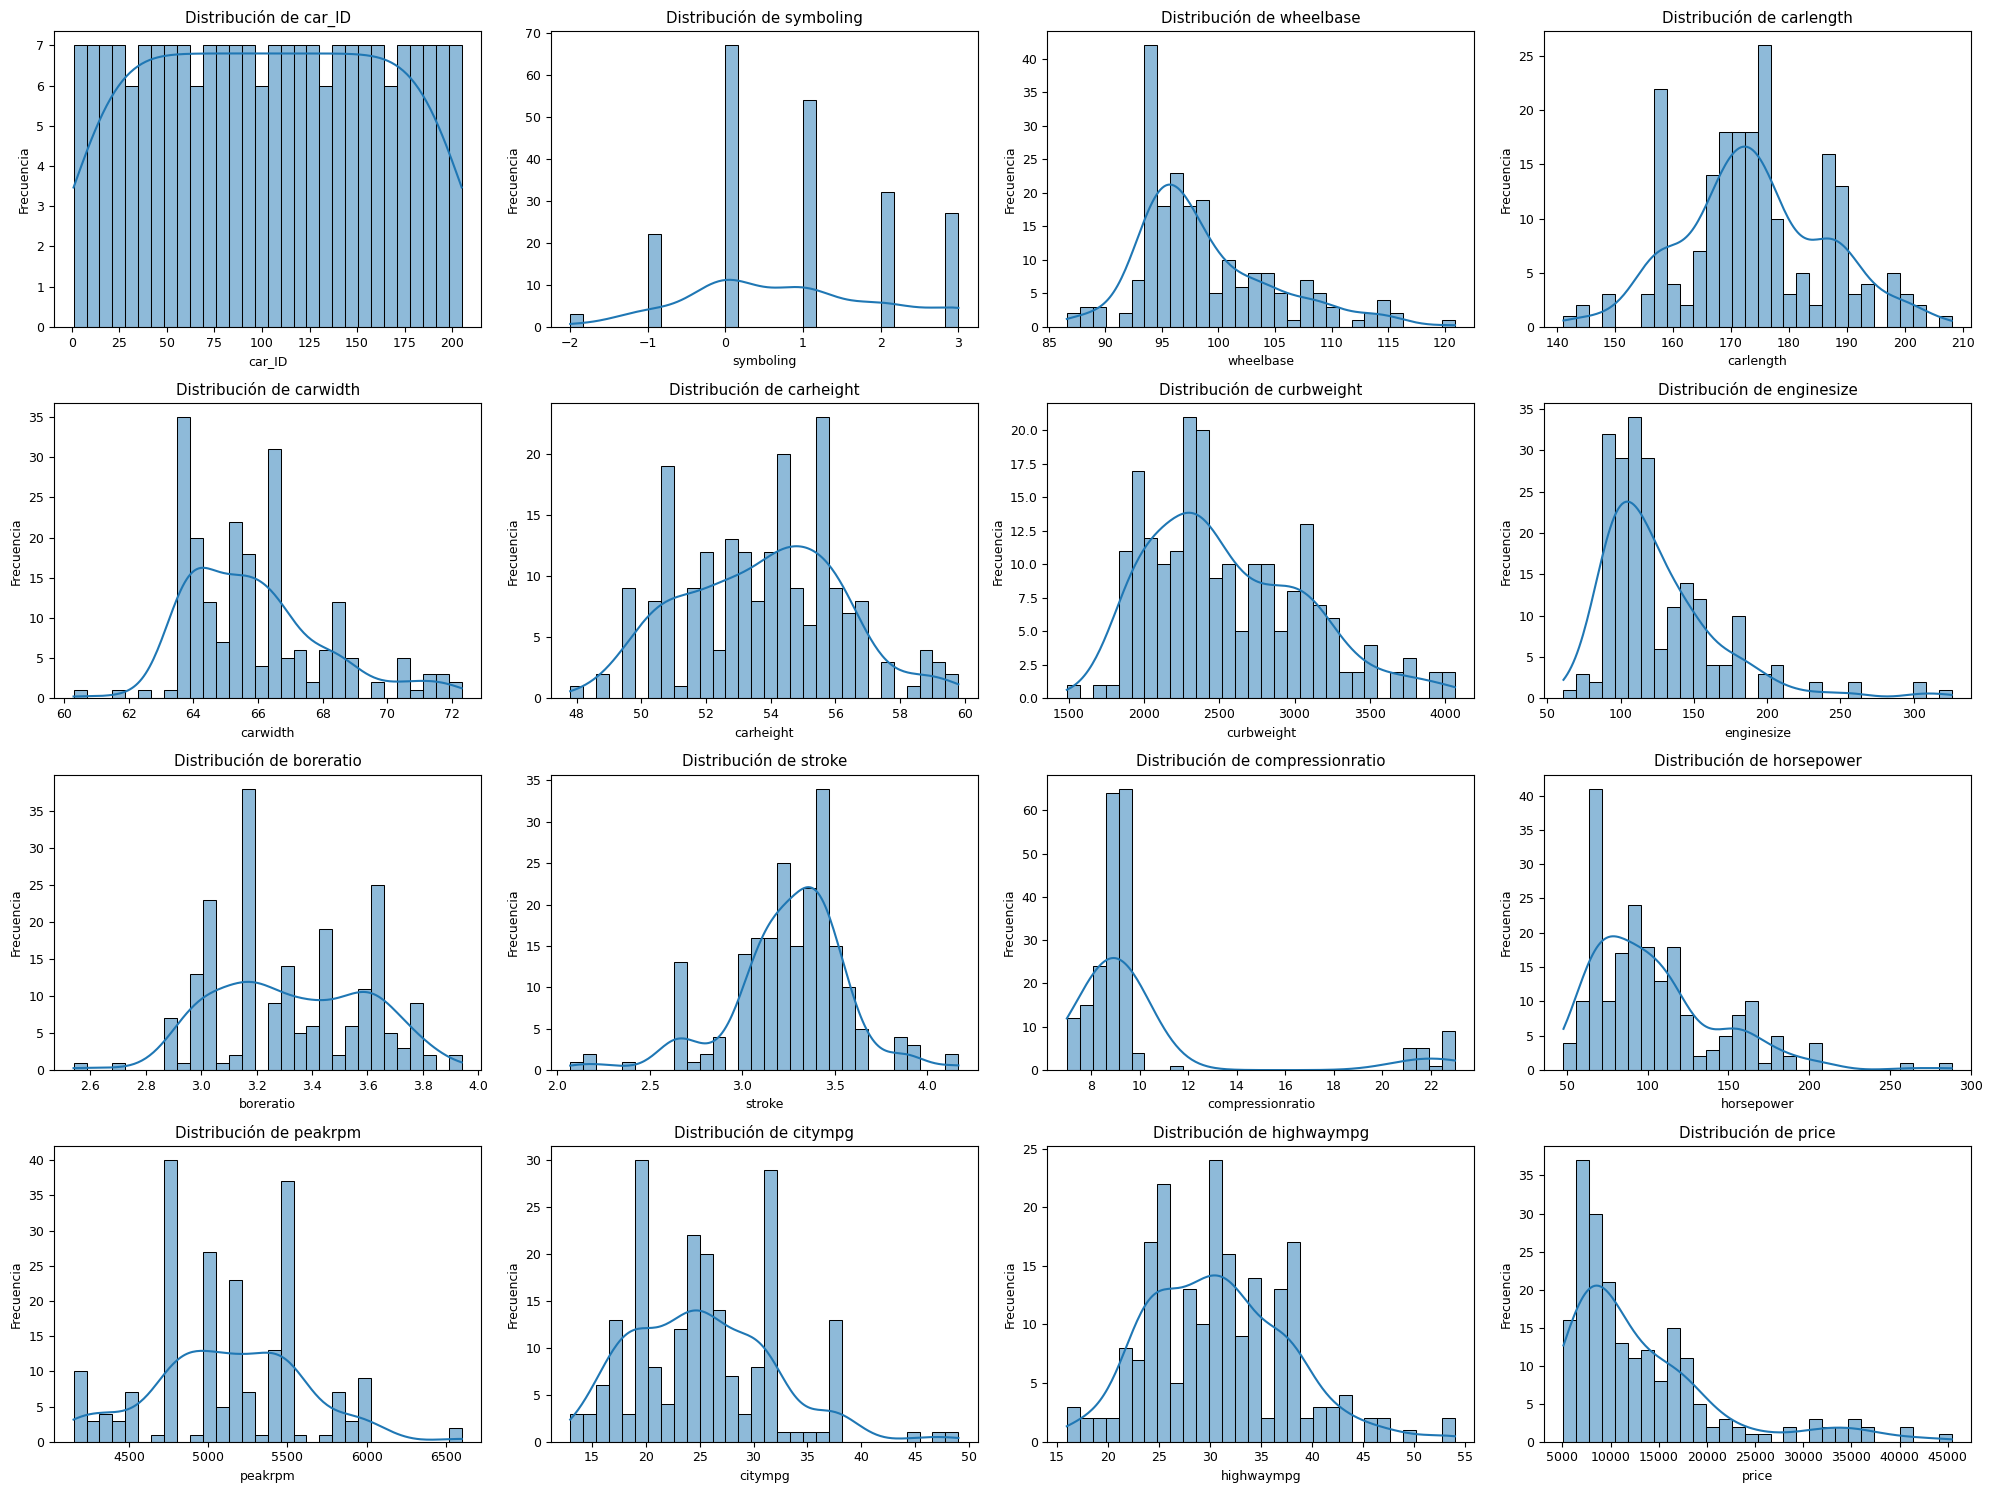

In [43]:
# Seleccionar columnas continuas
continuous_columns = cars.select_dtypes(include=[np.float64, np.int64]).columns

# Crear una figura con 4 filas y 4 columnas
plt.figure(figsize=(20, 15))  # Ajusta el tamaño según sea necesario

for i, col in enumerate(continuous_columns):
    plt.subplot(4, 4, i + 1)  # Crea un subplot en la posición i+1
    sns.histplot(cars[col], bins=30, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()  # Ajusta el espacio entre subplots
plt.show()

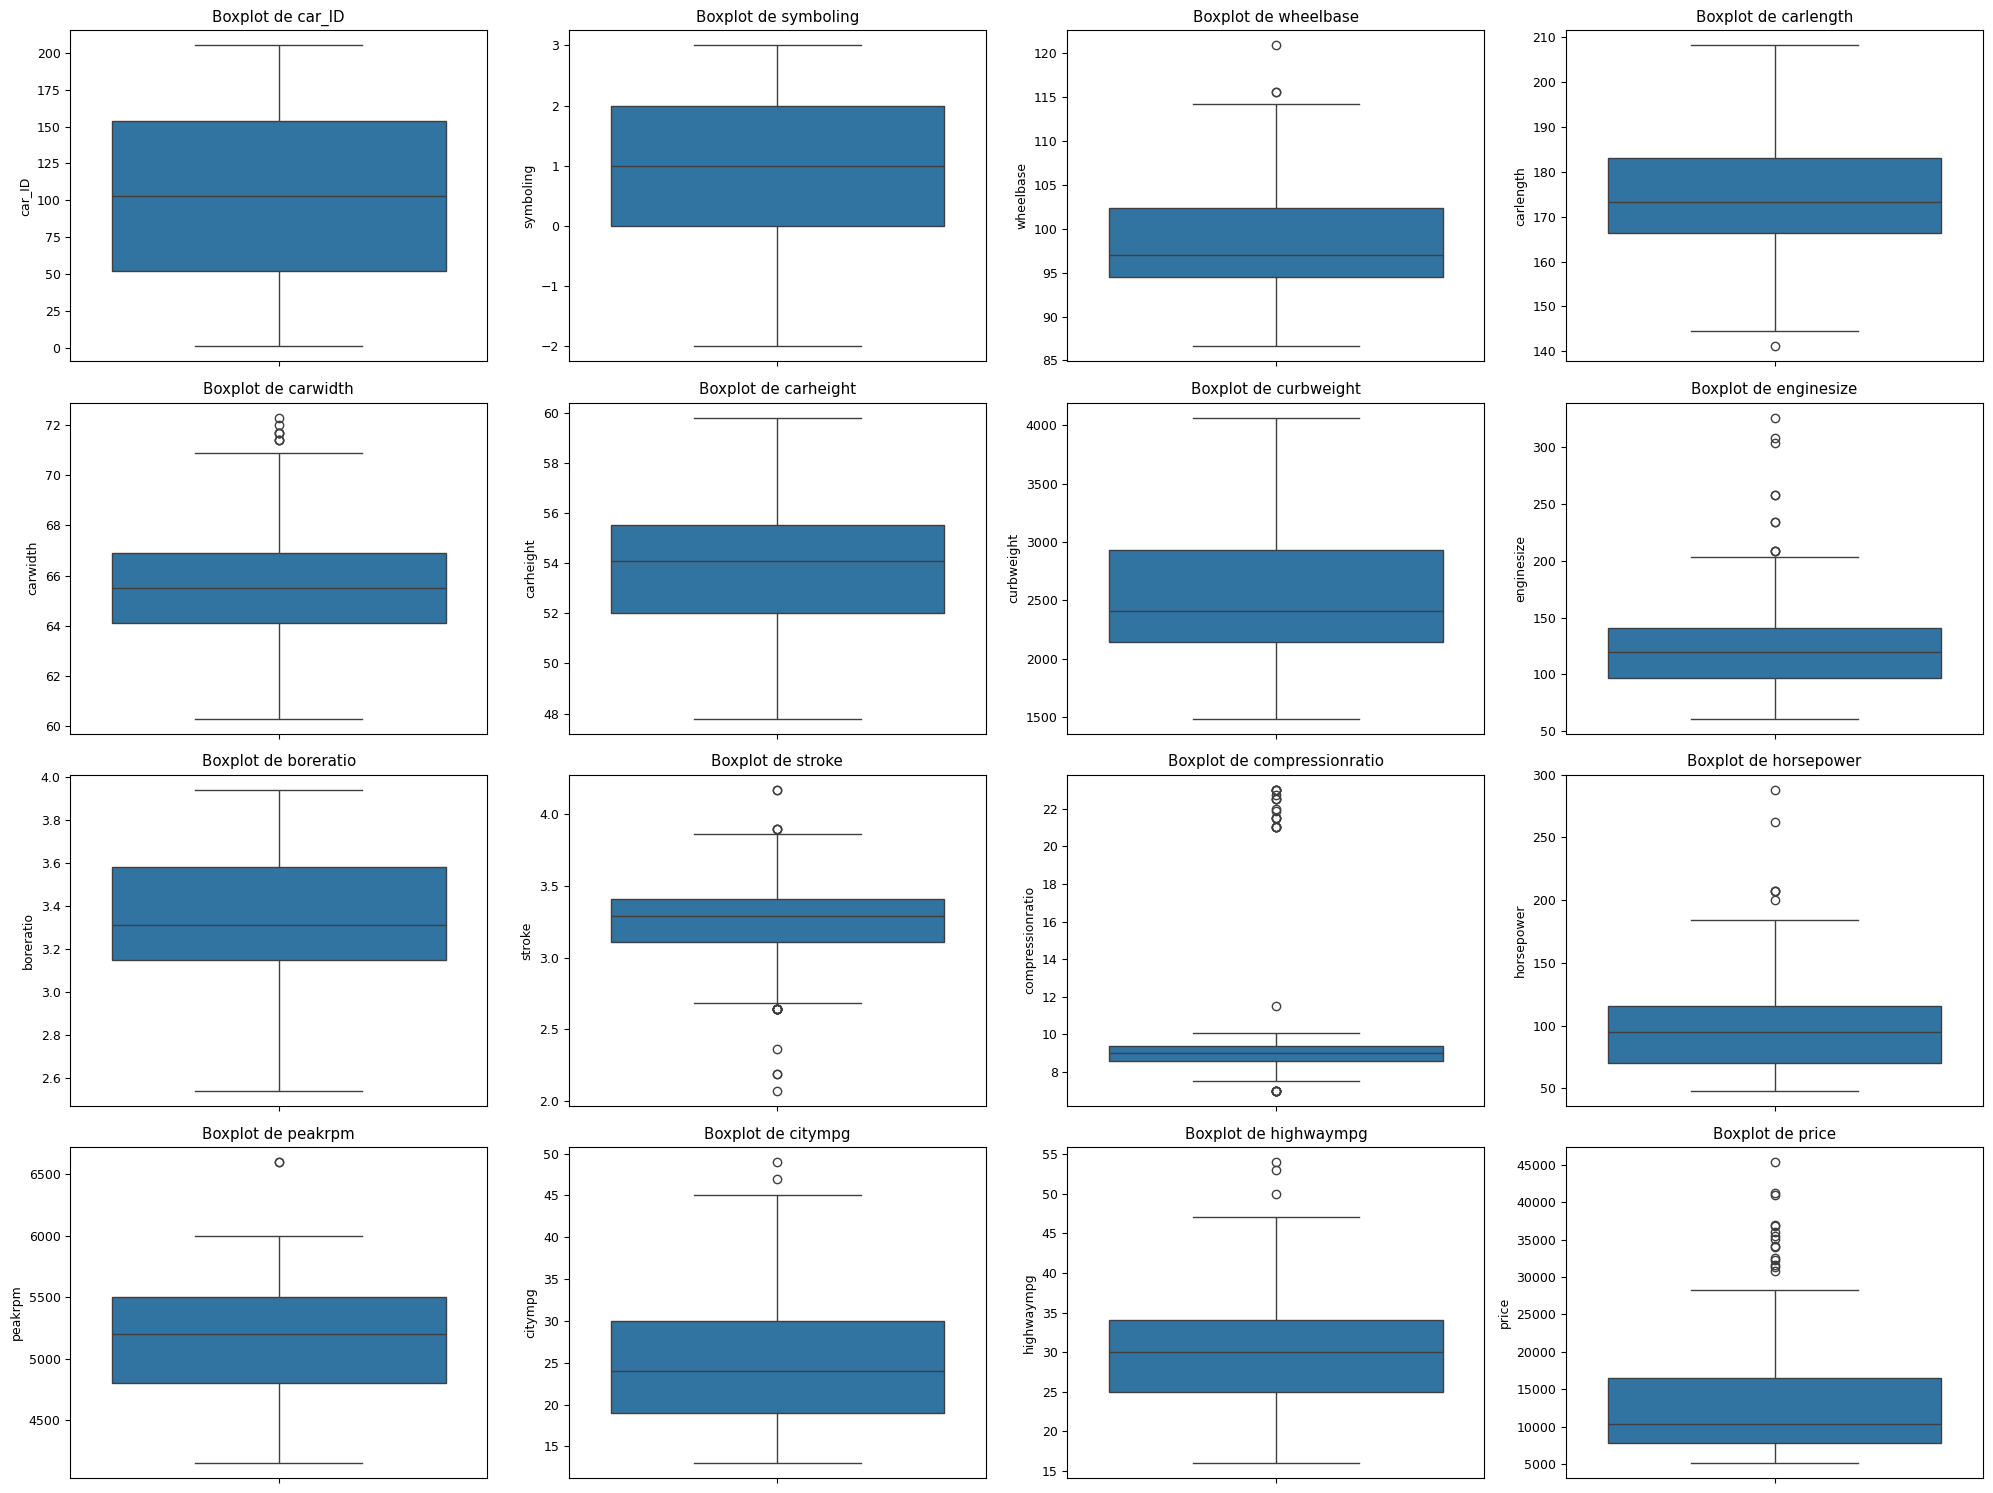

In [44]:
# Seleccionar columnas continuas
continuous_columns = cars.select_dtypes(include=[np.float64, np.int64]).columns

# Crear una figura con 4 filas y 4 columnas (ajustar filas y columnas según el número de variables)
plt.figure(figsize=(20, 15))  # Ajusta el tamaño según sea necesario

for i, col in enumerate(continuous_columns):
    plt.subplot(4, 4, i + 1)  # Crea un subplot en la posición i+1
    sns.boxplot(y=cars[col])
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)

plt.tight_layout()  # Ajusta el espacio entre subplots
plt.show()


En los histogramas, se puede observar la distribución de las variables continuas. Algunas como wheelbase, carlength y curbweight muestran distribuciones cercanas a lo normal, mientras que otras como enginesize, compressionratio y price presentan una asimetría pronunciada, lo que sugiere la presencia de valores atípicos.

En los boxplots, se identifican los valores atípicos (outliers) en varias variables, como en wheelbase, enginesize, compressionratio y price. Estos valores extremos podrían influir en los resultados de los modelos predictivos y podrían requerir tratamiento adicional. Por otro lado, algunas variables como carwidth y carheight tienen distribuciones más compactas sin outliers evidentes.

Relaciones entre Variables
- Matriz de correlación: Crear una matriz de correlación entre las variables numéricas (corr()) y visualizarla con un heatmap. Esto te permitirá ver qué características tienen una relación más fuerte con el precio.
- Scatterplots: Crear gráficos de dispersión (scatterplots) para ver la relación entre el precio y otras variables numéricas, como la potencia o el año.

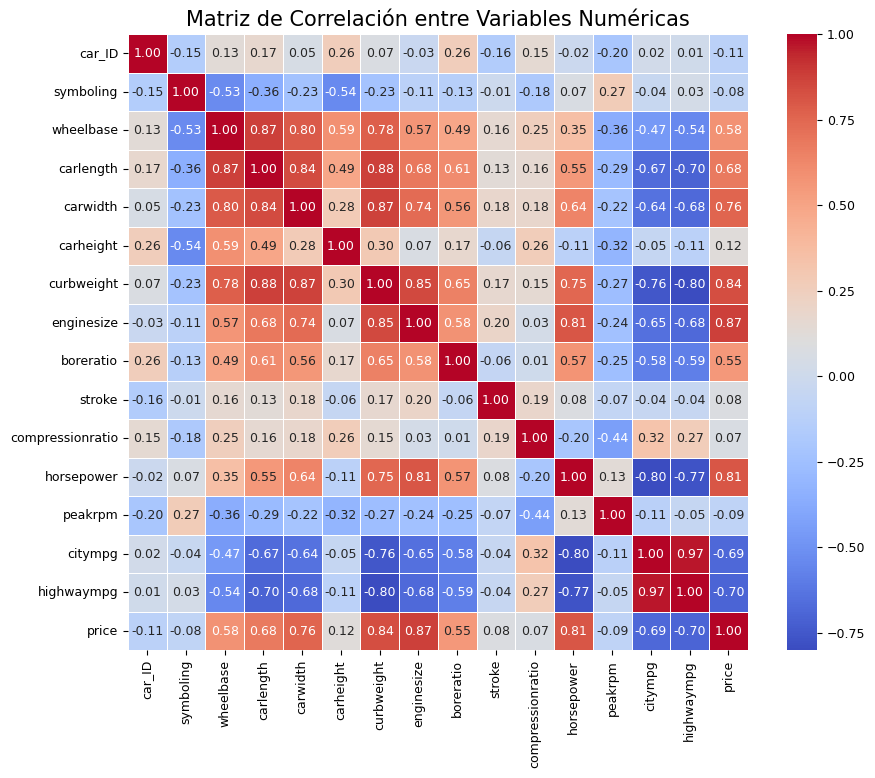

In [45]:
# Seleccionar solo las columnas numéricas del DataFrame
numeric_columns = cars.select_dtypes(include=[np.number])

# Calcular la matriz de correlación para las columnas numéricas
correlation_matrix = numeric_columns.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear el heatmap usando seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Añadir título
plt.title('Matriz de Correlación entre Variables Numéricas', size=15)

# Mostrar el gráfico
plt.show()


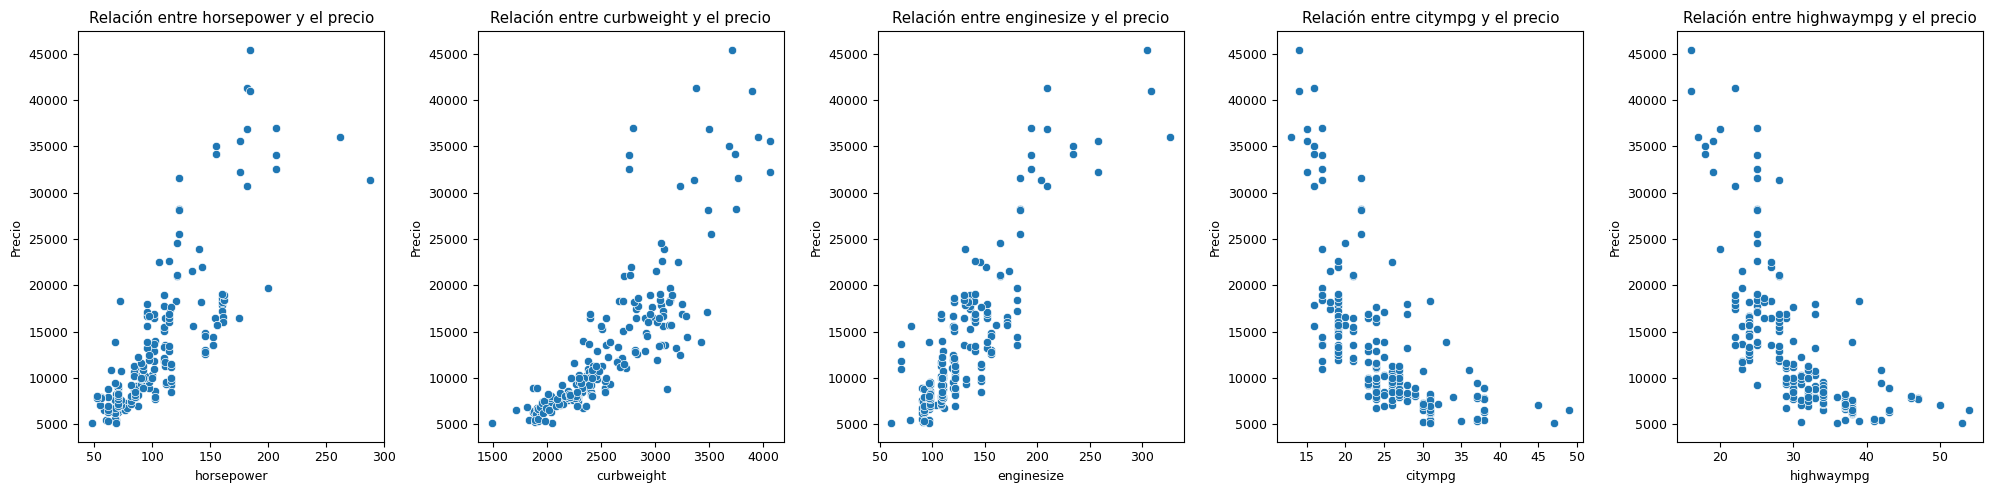

In [46]:
# Definir las variables a comparar con el precio
variables_to_compare = ['horsepower', 'curbweight', 'enginesize', 'citympg', 'highwaympg']  # Agrega o cambia las variables aquí

# Crear una figura con una fila
plt.figure(figsize=(20, 5))  # Tamaño de la figura, ancho mayor para que se vean mejor

# Crear un gráfico de dispersión para cada variable numérica respecto al precio
for i, var in enumerate(variables_to_compare):
    plt.subplot(1, len(variables_to_compare), i + 1)  # Crear un subplot en una sola fila
    sns.scatterplot(x=cars[var], y=cars['price'])  # Gráfico de dispersión
    plt.title(f'Relación entre {var} y el precio')
    plt.xlabel(var)
    plt.ylabel('Precio')

plt.tight_layout()  # Ajustar el espacio entre los subplots
plt.show()


Realicé un análisis de correlación entre las variables numéricas y el precio de los automóviles. Observé que variables como el peso del vehículo, el tamaño del motor y la potencia están fuertemente correlacionadas de manera positiva con el precio, mientras que el consumo de combustible tiene una relación negativa. Luego, visualicé estas relaciones mediante gráficos de dispersión, confirmando que los autos más grandes y potentes tienden a ser más caros, y los más eficientes en combustible suelen ser más económicos. Estos hallazgos serán clave para la construcción de los modelos predictivos.

Análisis de Variables Categóricas
- Gráficos de barras: Visualizar la distribución de variables categóricas (tipo de combustible, carrocería, etc.) usando gráficos de barras.
- Boxplots por categoría: Comparar el precio según las categorías importantes como el tipo de combustible, carrocería, y más.

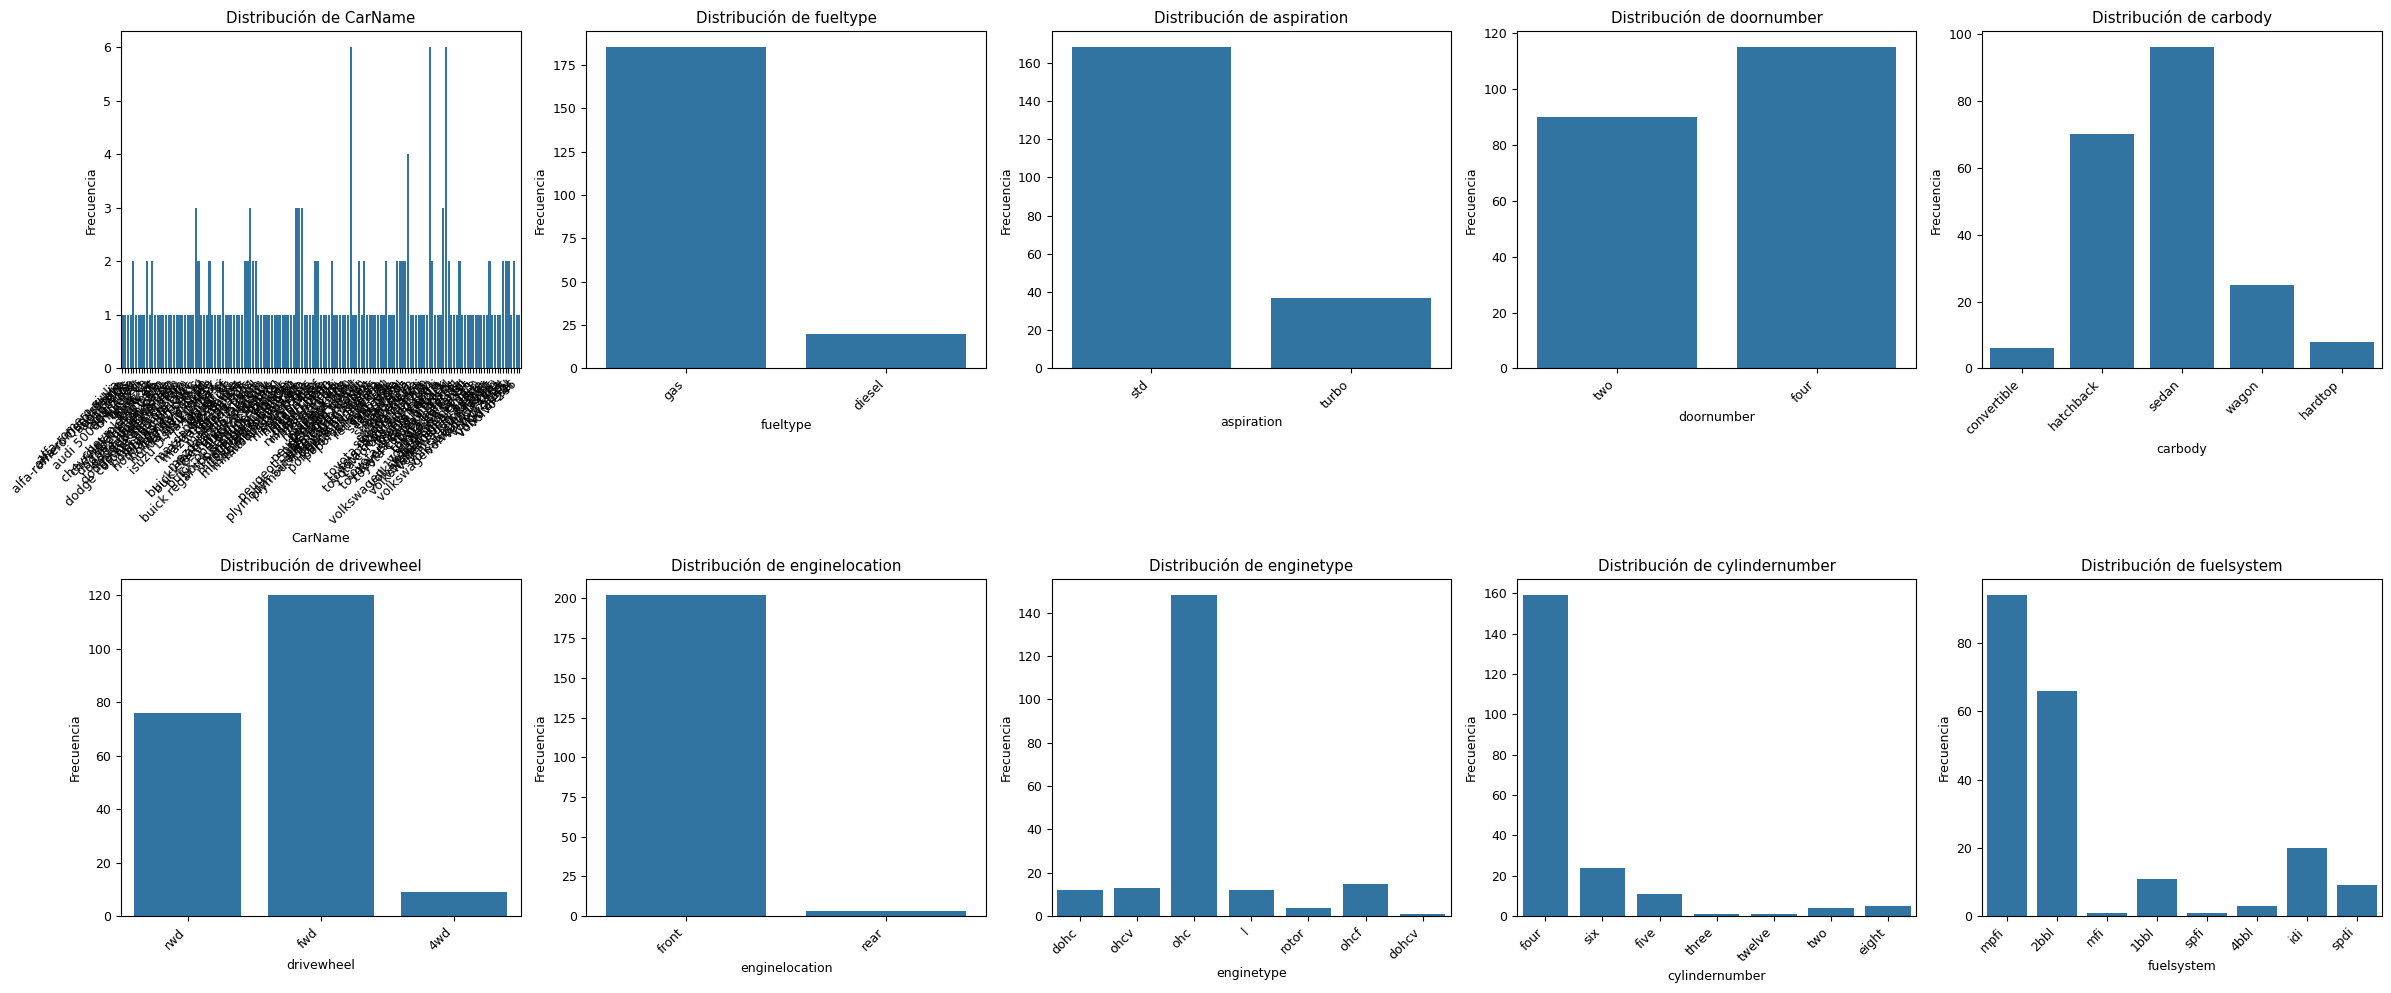

In [47]:
# Seleccionar columnas categóricas
categorical_columns = cars.select_dtypes(include=['object', 'category']).columns

# Crear una figura con 5 columnas y 2 filas (para mostrar los 10 gráficos)
plt.figure(figsize=(24, 10))  # Ajusta el tamaño de la figura

# Bucle para generar 10 subplots (5x2)
for i, col in enumerate(categorical_columns[:10]):  # Limitar a las primeras 10 columnas
    plt.subplot(2, 5, i + 1)  # 2 filas y 5 columnas
    sns.countplot(data=cars, x=col)  # Countplot para variables categóricas, eliminamos `palette`
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')  # Rotar etiquetas 45 grados y alinearlas a la derecha

plt.tight_layout()  # Ajustar el espacio entre los gráficos
plt.show()

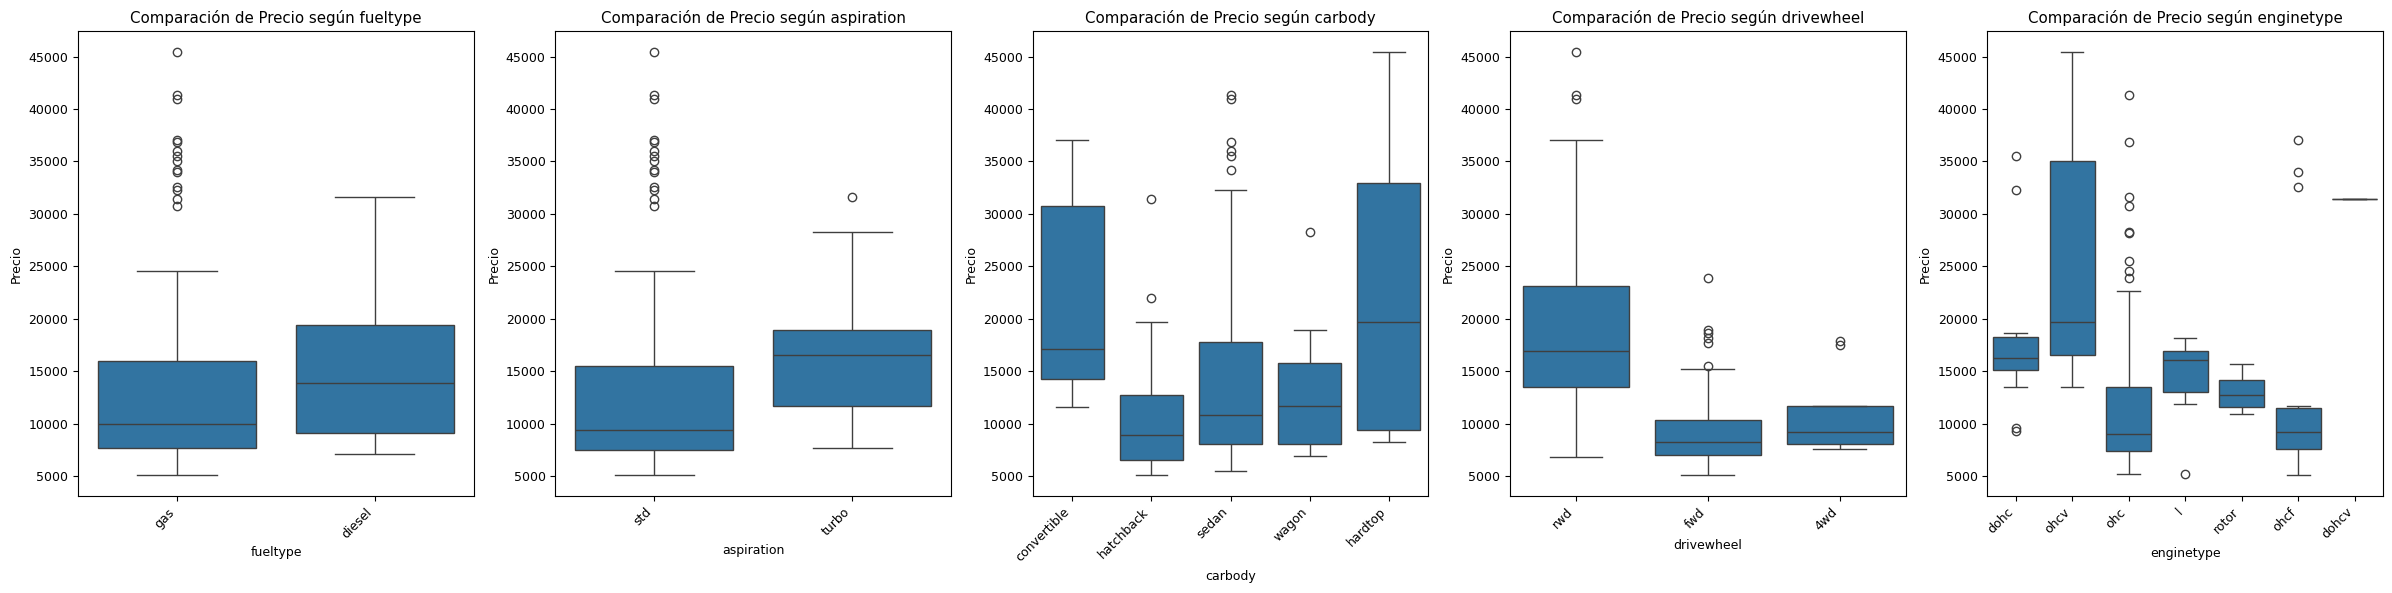

In [48]:
# Crear una figura con 5 columnas y 1 fila
plt.figure(figsize=(24, 6))  # Ajustar el tamaño de la figura

# Lista de variables categóricas importantes para comparar con el precio
categorical_columns_for_boxplot = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype']

# Bucle para generar subplots de Boxplots
for i, col in enumerate(categorical_columns_for_boxplot):
    plt.subplot(1, 5, i + 1)  # 1 fila y 5 columnas
    sns.boxplot(data=cars, x=col, y='price')  # Boxplot con la variable categórica y el precio
    plt.title(f'Comparación de Precio según {col}')
    plt.xlabel(col)
    plt.ylabel('Precio')
    plt.xticks(rotation=45, ha='right')  # Rotar etiquetas 45 grados y alinearlas a la derecha

plt.tight_layout()  # Ajustar el espacio entre los gráficos
plt.show()


En el análisis exploratorio de datos, he realizado una visualización exhaustiva de las variables categóricas y su relación con el precio de los automóviles. Utilicé gráficos de countplot para representar la distribución de las principales categorías como el tipo de combustible, el número de puertas y el tipo de carrocería. Estos gráficos revelaron patrones interesantes: la mayoría de los vehículos utilizan gasolina, y los sedanes son la carrocería más común en el conjunto de datos.

Posteriormente, implementé boxplots para comparar el precio de los automóviles en función de diferentes categorías. Los boxplots mostraron que los vehículos diésel tienden a tener precios más altos en comparación con los que utilizan gasolina. Además, observé que los automóviles con carrocería de tipo convertible y sedán presentan una gran variabilidad en sus precios, lo que sugiere que existen modelos de alto precio en esas categorías.

Análisis de Outliers
- Identificación de outliers: Detectar posibles valores atípicos en las variables numéricas clave (por ejemplo, el precio o la potencia) mediante boxplots y otras técnicas.
- Decisiones sobre outliers: Anotar si se va a tomar alguna acción sobre los outliers (removerlos o tratarlos).

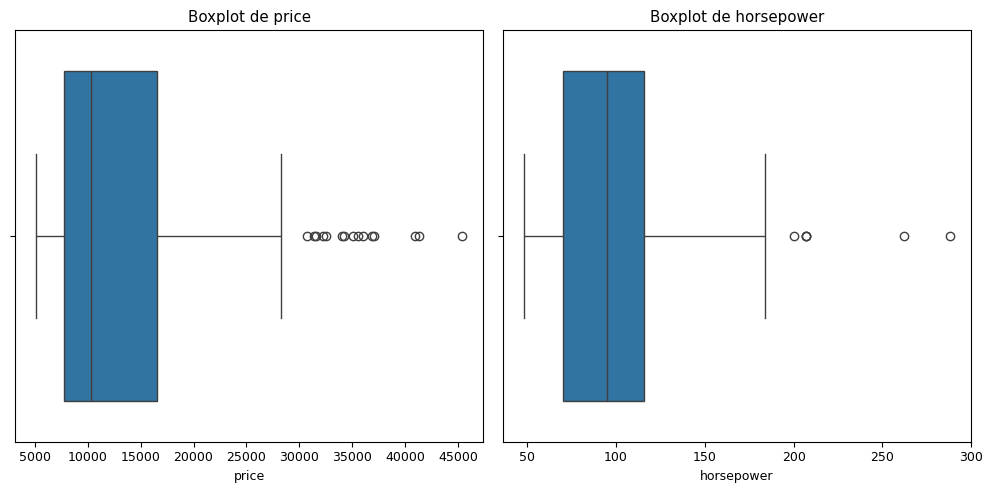

In [49]:
# Ajustar el tamaño de la fuente para los títulos, etiquetas y otros textos
plt.rcParams.update({'font.size': 9})  # Tamaño general de la fuente

# Lista de variables numéricas clave para el análisis (ejemplo: precio y potencia)
key_numeric_columns = ['price', 'horsepower']  # Puedes agregar más columnas si es necesario

# Crear boxplots para cada variable numérica clave
plt.figure(figsize=(10, 5))  # Ajustar tamaño de la figura

for i, col in enumerate(key_numeric_columns, 1):
    plt.subplot(1, len(key_numeric_columns), i)  # Crear subplots
    sns.boxplot(x=cars[col])  # Boxplot para cada columna
    plt.title(f'Boxplot de {col}')  # Título con el nombre de la columna

plt.tight_layout()  # Ajustar el diseño de la figura
plt.show()


Observando los **boxplots** de las variables **precio** y **potencia**, se puede notar la presencia de varios **outliers** en ambos casos:
- En el boxplot del **precio**, la mayoría de los vehículos se encuentran en un rango entre aproximadamente **$5000 y $20000**, pero se observan valores atípicos que superan los **$25000**, e incluso alcanzan hasta los **$45000**. Estos outliers pueden corresponder a vehículos de lujo o de alta gama, por lo que es importante analizar si los mantendré o no en el análisis final, dependiendo de su impacto en el modelo.
- En el caso de la **potencia**, la mayoría de los vehículos tienen entre **50 y 150 caballos de fuerza**, pero hay varios puntos atípicos que superan los **200 caballos**, lo cual es poco común. Es posible que estos vehículos representen modelos deportivos o de alto rendimiento. También tendré que decidir si estos outliers distorsionan los resultados o si aportan información relevante al modelo.

En ambos gráficos, los valores atípicos merecen atención especial, ya que podrían afectar las predicciones si no son tratados adecuadamente. Decidiré si elimino estos outliers o si los transformo en variables para mitigar su impacto en el modelo final.

**Conclusiones del Análisis Exploratorio de Datos (EDA)**

Resumen de hallazgos: Durante el EDA, se han observado varias distribuciones y relaciones interesantes en el conjunto de datos:

Distribuciones:
- Precio: La distribución del precio presenta una asimetría, con una concentración significativa de vehículos en el rango inferior de precios (alrededor de $5000 a $15000). Existen algunos outliers en el extremo superior, lo que sugiere que hay vehículos de lujo que podrían influir en los resultados del análisis.
- Potencia: La potencia de los vehículos también muestra una distribución sesgada, con la mayoría de los vehículos situados entre 50 y 150 caballos de fuerza. Nuevamente, se identificaron valores atípicos en la parte superior, lo que podría indicar la presencia de modelos de alto rendimiento.

Relaciones:
- Al analizar las comparaciones de precios según diferentes variables categóricas como tipo de combustible, tipo de carrocería y número de puertas, se encontró que ciertas categorías, como los vehículos convertibles y con motor de tipo dohc, tienden a tener precios más altos en comparación con otros.
- La variable aspiración mostró que los vehículos con motores turbo son más caros que aquellos con motores estándar, lo que indica una relación entre la complejidad del motor y el precio del vehículo.

Patrones:
- La variable tipo de combustible mostró una clara predominancia del gas frente al diésel, lo que puede influir en el tipo de clientes y sus preferencias.
- Las variables relacionadas con la ubicación del motor y el número de puertas también tienen efectos notables sobre los precios, lo que puede ser importante para la segmentación de mercado.

Ideas para el modelado:
Con base en los hallazgos del EDA, se identifican las siguientes variables como potencialmente más relevantes para los modelos de predicción:

- Precio: La variable objetivo para el modelo de regresión.
- Potencia: Una variable clave que puede influir significativamente en el precio de los vehículos.
- Tipo de combustible: Esta variable puede ayudar a segmentar los vehículos en categorías con diferentes precios.
- Tipo de carrocería: Puede tener un impacto importante en el precio debido a las diferencias en estilo y funcionalidad.
- Número de puertas y ubicación del motor: Estas variables podrían tener correlaciones con el precio y deberían considerarse en el modelo.

Este EDA proporciona una base sólida para la próxima fase de Preparación de Datos y Modelado, ya que he podido identificar patrones, valores faltantes, outliers y las relaciones entre las variables que influirán en la construcción de los modelos predictivos.

### **2. Preparación de Datos**

Tratamiento de valores faltantes: Durante el análisis exploratorio de datos (EDA), verifiqué si había valores nulos o faltantes y confirmé que el dataset está completo. No es necesario realizar ninguna imputación, por lo que puedo avanzar sin contratiempos a la siguiente etapa de preparación de datos.

Limpieza y normalización de los datos: 
- Conversión de Texto a Minúsculas: Convertiré a minúsculas los textos en las columnas clave para evitar duplicidades por diferencias de formato.
- Separación de `car_name`: Dividiré la columna `car_name` en `marca` y `modelo` para tratarlas de forma independiente.
- Corrección de Nombres en `marca` y `modelo`: Corregiré errores tipográficos y normalizaré los nombres para garantizar la consistencia de los datos.
- Normalización de Modelos: Usaré expresiones regulares para limpiar y unificar los nombres de los modelos, eliminando información redundante.
- Corrección de Modelos Específicos: Aplicaré un diccionario de corrección para ajustar modelos con nombres incorrectos o confusos.
- Revisión Final y Ordenación: Revisaré y ordenaré los datos por marca y modelo para asegurar la coherencia de las correcciones realizadas.

In [50]:
# Normalización Nombres de las Columnas
print(f"* Nombres originales de las columnas:\n  {cars.columns}\n")
print("- " * 40)
def convert_to_snake_case(column_name):
    return inflection.underscore(column_name)

cars.columns = [convert_to_snake_case(col) for col in cars.columns]

#Crear el diccionario con los titulos de las columnas que vamos a cambiar
diccionario_columnas = {
    'fueltype': 'fuel_type','doornumber': 'door_number', 'carbody': 'car_body', 'drivewheel': 'drive_wheel',
    'enginelocation': 'engine_location','wheelbase': 'wheel_base','carlength': 'car_length','car_width': '',
    'carheight': 'car_height','curbweight': 'curb_weight','enginetype': 'engine_type','cylindernumber': 'cylinder_number',
    'enginesize': 'engine_size','fuelsystem': 'fuel_system','boreratio': 'bore_ratio','compressionratio': 'compression_ratio',
    'horsepower': 'horse_power','peakrpm': 'peak_rpm','citympg': 'city_mpg','highwaympg': 'highway_mpg','carwidth':"car_width"
}

#Cambiar los nombres de las columnas
for columna in cars.columns:
    if columna in diccionario_columnas:
        nuevo_nombre = diccionario_columnas[columna]
        cars.rename(columns={columna: nuevo_nombre}, inplace=True)

#Verificar que los nombres se hallan cambiado 
print(f"* Nuevos nombres de las columnas:\n  {cars.columns}")

* Nombres originales de las columnas:
  Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
* Nuevos nombres de las columnas:
  Index(['car_id', 'symboling', 'car_name', 'fuel_type', 'aspiration',
       'door_number', 'car_body', 'drive_wheel', 'engine_location',
       'wheel_base', 'car_length', 'car_width', 'car_height', 'curb_weight',
       'engine_type', 'cylinder_number', 'engine_size', 'fuel_system',
       'bore_ratio', 'stroke', 'compression_ratio', 'horse_power', 'peak_rpm',
       'city_mpg', 'highway_mpg', 'price'],
      dtype='object')


In [51]:
#Separar la columna car_id en dos columnas (marca y modelo)
cars['car_name'] = cars['car_name'].str.lower()
cars[['marca', 'modelo']] = cars['car_name'].str.split(' ', n=1, expand=True)
cars = cars[['car_id', 'car_name', 'marca', 'modelo'] + [col for col in cars.columns if col not in ['car_id', 'car_name', 'marca', 'modelo']]]

# Reorganizar las columnas para que 'car_id', 'car_name', 'marca', y 'modelo' sean las primeras
styled_cars = cars.style.set_properties(**{'text-align': 'left'}, subset=['marca', 'modelo'])
styled_cars

# Estilo para alinear el contenido de las columnas 'marca' y 'modelo' a la izquierda
cars = cars.drop('car_name', axis=1)
print("* Los valores únicos de la columna marca son:")
print("- " * 37)
print(cars.marca.unique())

* Los valores únicos de la columna marca son:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [52]:
# Corrección en nombres de marcas
marca_correccion = {'alfa-romero': 'alfa romeo', 
                    'maxda': 'mazda',
                    'Nissan': 'nissan',
                    'porcshce': 'porsche',
                    'toyouta': 'toyota', 
                    'vokswagen': 'volkswagen',
                    'vw': 'volkswagen'}
cars['marca'] = cars['marca'].replace(marca_correccion)

# Combinaciones únicas de marca y modelo
sorted_cars = cars.sort_values(by=['marca', 'modelo'], ascending=[True, True])
print("* Combinaciones únicas de marca y modelo:")
print("- " * 37)
print((cars['marca'] + ' | ' + cars['modelo'].astype(str)).unique(), end='\n\n')

* Combinaciones únicas de marca y modelo:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
['alfa romeo | giulia' 'alfa romeo | stelvio' 'alfa romeo | quadrifoglio'
 'audi | 100 ls' 'audi | 100ls' 'audi | fox' 'audi | 5000' 'audi | 4000'
 'audi | 5000s (diesel)' 'bmw | 320i' 'bmw | x1' 'bmw | x3' 'bmw | z4'
 'bmw | x4' 'bmw | x5' 'chevrolet | impala' 'chevrolet | monte carlo'
 'chevrolet | vega 2300' 'dodge | rampage' 'dodge | challenger se'
 'dodge | d200' 'dodge | monaco (sw)' 'dodge | colt hardtop'
 'dodge | colt (sw)' 'dodge | coronet custom' 'dodge | dart custom'
 'dodge | coronet custom (sw)' 'honda | civic' 'honda | civic cvcc'
 'honda | accord cvcc' 'honda | accord lx' 'honda | civic 1500 gl'
 'honda | accord' 'honda | civic 1300' 'honda | prelude'
 'honda | civic (auto)' 'isuzu | mu-x' 'isuzu | d-max '
 'isuzu | d-max v-cross' 'jaguar | xj' 'jaguar | xf' 'jaguar | xk'
 'mazda | rx3' 'mazda | glc deluxe' 'mazda | rx2 coupe' 'mazda | rx-4'
 'mazda | 626

In [53]:
# Limpieza de la columna modelo
def limpiar_modelo(input_string, modelo):
    # Patrón regex que coincide con el modelo seguido de cualquier cosa
    patron = re.compile(rf'{modelo}.*', flags=re.IGNORECASE)
    
    # Reemplazar todas las ocurrencias que coinciden con el patrón por el modelo
    return re.sub(patron, modelo, input_string)

# Lista de modelos a limpiar
modelos_a_limpiar = ['accord', 'civic', '100', 'corolla', 'corona', '99', 'celica', 
                     'century', 'rabbit', 'mirage', 'glc', 'fury', 'd-max', 
                     'coronet', 'colt']

# Aplicar la limpieza a cada modelo
for modelo in modelos_a_limpiar:
    cars['modelo'] = cars['modelo'].astype(str).apply(limpiar_modelo, modelo=modelo)

# Visualizar el resultado en pantalla
print("* Resultados de la limpieza de la columna 'modelo':")
print("-" * 51)
print(cars[['modelo']].head())  # Muestra las primeras filas de la columna modelo

* Resultados de la limpieza de la columna 'modelo':
---------------------------------------------------
         modelo
0        giulia
1       stelvio
2  quadrifoglio
3           100
4           100


In [54]:
# Corrección de los nombres de modelos
modelo_correccion = {'100': 'a6', 
                     'fox': '80',
                     'corona': 'cressida',
                     'mark ii': 'cressida'}
cars['modelo'] = cars['modelo'].replace(modelo_correccion)
print("* Resultados de la corrección de la columna 'modelo':")
print("-" * 51)
print(cars[['modelo']].head())  # Muestra las primeras filas de la columna modelo

* Resultados de la corrección de la columna 'modelo':
---------------------------------------------------
         modelo
0        giulia
1       stelvio
2  quadrifoglio
3            a6
4            a6


In [55]:
# Redondear la columna 'price' y convertir a enteros
cars['price'] = cars['price'].round().astype(int)

# Calcula la mediana de la columna "price"
mediana_precio = cars['price'].median()

# Crea la columna "clasificacion_precio" utilizando una condición
cars['clasificacion_precio'] = (cars['price'] <= mediana_precio).astype(int)
print(* "Clasificación de precios:")
print("-" * 51)
print(cars[['price', 'clasificacion_precio']]) #1 si el valor se encuentra debajo de la mediana y 0 si se encuentra sobre la mediana

C l a s i f i c a c i ó n   d e   p r e c i o s :
---------------------------------------------------
     price  clasificacion_precio
0    13495                     0
1    16500                     0
2    16500                     0
3    13950                     0
4    17450                     0
..     ...                   ...
200  16845                     0
201  19045                     0
202  21485                     0
203  22470                     0
204  22625                     0

[205 rows x 2 columns]


Pasos importantes para procesar y clasificar los precios de los autos del DataFrame. 

In [56]:
# Diccionario de mapeo de valores
mapeo = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 20}

In [57]:
# columna "door_number": número de puertas
print("* Columna: door_number (número de puertas)")
print("- " * 25)
print(f"* Valores Originales: {cars['door_number'].unique()}")
print("- " * 25)
cars['door_number'] = cars['door_number'].map(mapeo)  # Mapea los valores de texto a números
print("* Valores Convertidos a Números:")
print("- " * 25)
print(cars['door_number'])
print("- " * 25)

* Columna: door_number (número de puertas)
- - - - - - - - - - - - - - - - - - - - - - - - - 
* Valores Originales: ['two' 'four']
- - - - - - - - - - - - - - - - - - - - - - - - - 
* Valores Convertidos a Números:
- - - - - - - - - - - - - - - - - - - - - - - - - 
0      2
1      2
2      2
3      4
4      4
      ..
200    4
201    4
202    4
203    4
204    4
Name: door_number, Length: 205, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - 


In [58]:
#columna "cylinder_number":número de cilindros del motor
print("* Columna: cylinder_number")
print("- " * 40)
print(f"* Valores Originales: {cars['cylinder_number'].unique()}")
print("- " * 40)
cars['cylinder_number'] = cars['cylinder_number'].map(mapeo)
cars['cylinder_number'] = cars['cylinder_number'].fillna(0)
cars['cylinder_number'] = cars['cylinder_number'].astype(int)
print("* Valores Convertidos a Números:")
print("- " * 40)
print(cars['cylinder_number'])
print("- " * 40)

* Columna: cylinder_number
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
* Valores Originales: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
* Valores Convertidos a Números:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylinder_number, Length: 205, dtype: int32
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


Análisis Visual de los Datos

Normalización en las Filas

Busco los valores atipicos (outliers) de manera visual  mediante histogramas

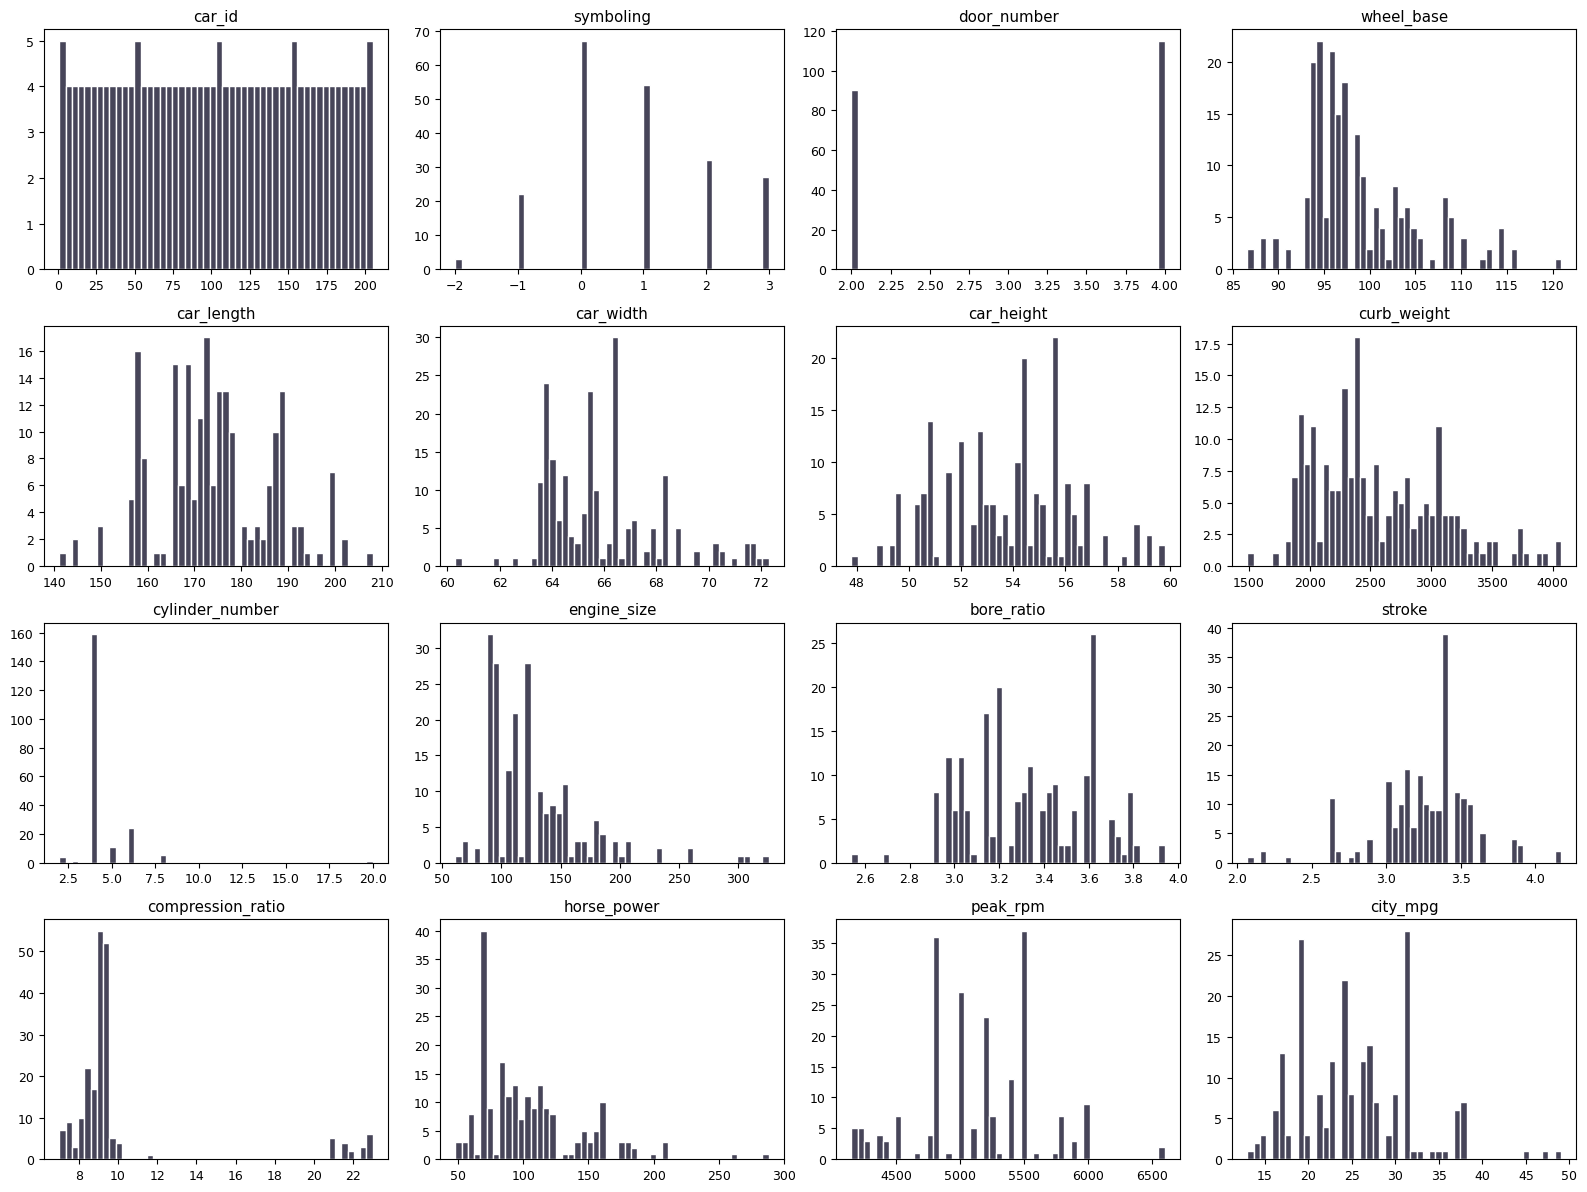

In [59]:
# Seleccionar solo las columnas numéricas del DataFrame
numeric_columns = cars.select_dtypes(include='number')

# Seleccionar las primeras 16 columnas numéricas (si hay más de 16)
selected_columns = numeric_columns.iloc[:, :16]

# Calcular el número de filas y columnas para los subplots (4x4 = 16 gráficos)
num_rows = 4
num_cols = 4

# Crear subplots para 16 columnas numéricas
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))

# Aplanar la matriz de subplots
axes = axes.flatten()

# Iterar sobre las 16 columnas numéricas y crear histogramas
for i, col in enumerate(selected_columns.columns):
    axes[i].hist(cars[col], bins=50, color='#474559', edgecolor='white')  # Cambié df a cars
    axes[i].set_title(col)

# Ajustar el diseño de los subplots para evitar superposición
plt.tight_layout()

# Mostrar el histograma
plt.show()


In [60]:
# Seleccionar solo las columnas numéricas del DataFrame
numeric_columns = cars.select_dtypes(include='number')

# Seleccionar las primeras 16 columnas numéricas (si hay más de 16)
selected_columns = numeric_columns.iloc[:, :16]

# Mostrar las columnas seleccionadas
print(selected_columns)


     car_id  symboling  door_number  wheel_base  car_length  car_width  \
0         1          3            2        88.6       168.8       64.1   
1         2          3            2        88.6       168.8       64.1   
2         3          1            2        94.5       171.2       65.5   
3         4          2            4        99.8       176.6       66.2   
4         5          2            4        99.4       176.6       66.4   
..      ...        ...          ...         ...         ...        ...   
200     201         -1            4       109.1       188.8       68.9   
201     202         -1            4       109.1       188.8       68.8   
202     203         -1            4       109.1       188.8       68.9   
203     204         -1            4       109.1       188.8       68.9   
204     205         -1            4       109.1       188.8       68.9   

     car_height  curb_weight  cylinder_number  engine_size  bore_ratio  \
0          48.8         2548         

Después de limpiar los datos, realicé un análisis visual utilizando histogramas para identificar posibles valores atípicos en las variables numéricas. En algunos casos, observé outliers en los extremos de las distribuciones, como en las variables wheelbase, carlength, carwidth, donde los valores atípicos aparecen hacia la derecha. Lo mismo ocurre con curbweight, enginesize, horsepower, que muestran outliers en los extremos superiores. También se identificaron posibles valores atípicos en compressionratio, price, citympg, y highwaympg, donde los datos presentan concentraciones en rangos más bajos y algunos valores aislados. Para profundizar en la identificación de outliers, sería conveniente aplicar métodos formales, como el rango intercuartílico o el Z-score.

In [61]:
# Verificar los nombres de las columnas en el DataFrame
print(cars.columns)

Index(['car_id', 'marca', 'modelo', 'symboling', 'fuel_type', 'aspiration',
       'door_number', 'car_body', 'drive_wheel', 'engine_location',
       'wheel_base', 'car_length', 'car_width', 'car_height', 'curb_weight',
       'engine_type', 'cylinder_number', 'engine_size', 'fuel_system',
       'bore_ratio', 'stroke', 'compression_ratio', 'horse_power', 'peak_rpm',
       'city_mpg', 'highway_mpg', 'price', 'clasificacion_precio'],
      dtype='object')


In [62]:
# Función para detectar outliers usando IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Aplicar la función para las columnas numéricas de interés
columns_to_check = ['wheel_base', 'car_length', 'curb_weight', 'engine_size', 
                    'horse_power', 'compression_ratio', 'price', 'city_mpg', 'highway_mpg']

for col in columns_to_check:
    outliers = detect_outliers_iqr(cars, col)  # Aquí 'cars' es el DataFrame correcto
    print(f"Outliers en {col}:")
    print(outliers[[col]])
    print("-" * 40)


Outliers en wheel_base:
    wheel_base
70       115.6
71       115.6
73       120.9
----------------------------------------
Outliers en car_length:
    car_length
18       141.1
----------------------------------------
Outliers en curb_weight:
Empty DataFrame
Columns: [curb_weight]
Index: []
----------------------------------------
Outliers en engine_size:
    engine_size
15          209
16          209
17          209
47          258
48          258
49          326
71          234
72          234
73          308
74          304
----------------------------------------
Outliers en horse_power:
     horse_power
49           262
105          200
126          207
127          207
128          207
129          288
----------------------------------------
Outliers en compression_ratio:
     compression_ratio
9                  7.0
29                 7.0
49                11.5
63                22.7
66                22.0
67                21.5
68                21.5
69                21.5


#### Resumen de Outliers:
- wheelbase: Outliers en 115.6 y 120.9.
- carlength: Outlier en 141.1.
- curbweight: Sin outliers.
- enginesize: Outliers en 209, 258 y 326.
- horsepower: Outliers en 262, 200 y 288.
- compressionratio: Outliers en 7.0 y 22.7.
- price: Outliers en 30760.0 y 41315.0.
- citympg: Outliers en 47 y 49.
- highwaympg: Outliers en 53 y 54.


#### Tratamiento de los outliers:
He identificado la presencia de outliers en varias variables clave: wheel_base, car_length, engine_size, horse_power, compression_ratio, price, city_mpg, y highway_mpg. Para evitar que estos valores extremos afecten los resultados de mis análisis y modelos, he decidido reemplazarlos por la mediana de cada variable. Esta técnica me permite mantener el tamaño del dataset mientras elimino el impacto de los outliers, ya que la mediana es una medida robusta frente a valores extremos.

In [63]:
# Función para reemplazar outliers por la mediana
def reemplazar_outliers_mediana(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Calcular la mediana de la columna
    mediana = df[column].median()
    # Reemplazar los valores por fuera del IQR por la mediana
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = mediana

# Aplicamos la función a las columnas que tienen outliers
columns_with_outliers = ['wheel_base', 'car_length', 'engine_size', 'horse_power', 
                         'compression_ratio', 'price', 'city_mpg', 'highway_mpg']

for col in columns_with_outliers:
    reemplazar_outliers_mediana(cars, col)

# Mostramos un resumen después de reemplazar los outliers
print("Datos después de reemplazar outliers:")
print(cars.describe())


Datos después de reemplazar outliers:
           car_id   symboling  door_number  wheel_base  car_length  \
count  205.000000  205.000000   205.000000  205.000000  205.000000   
mean   103.000000    0.834146     3.121951   98.458537  174.205854   
std     59.322565    1.245307     0.994966    5.570721   12.118818   
min      1.000000   -2.000000     2.000000   86.600000  144.600000   
25%     52.000000    0.000000     2.000000   94.500000  166.800000   
50%    103.000000    1.000000     4.000000   97.000000  173.200000   
75%    154.000000    2.000000     4.000000  101.200000  183.100000   
max    205.000000    3.000000     4.000000  114.200000  208.100000   

        car_width  car_height  curb_weight  cylinder_number  engine_size  \
count  205.000000  205.000000   205.000000       205.000000   205.000000   
mean    65.907805   53.724878  2555.565854         4.419512   120.326829   
std      2.145204    2.443522   520.680204         1.441544    28.356891   
min     60.300000   47.8000

#### Aplicación de One-Hot Encoding a Variables Categóricas
En esta etapa, aplicaré One-Hot Encoding a las variables categóricas de mi dataset. Utilizaré la función get_dummies de pandas para convertir las categorías en columnas binarias. Esto facilitará el uso de estas variables en mis modelos de machine learning. Me enfocaré en las columnas fuel_type, marca y modelo, eliminando la primera categoría para evitar problemas de multicolinealidad. Esto permitirá que mi DataFrame esté en un formato adecuado para el análisis posterior.

In [64]:
# Aplicamos One-Hot Encoding a las variables categóricas
categorical_columns = ['fuel_type', 'marca', 'modelo']  # Uso los nombres correctos
cars_encoded = pd.get_dummies(cars, columns=categorical_columns, drop_first=True)

# Mostramos las primeras filas del nuevo DataFrame
print(cars_encoded.head())



   car_id  symboling aspiration  door_number     car_body drive_wheel  \
0       1          3        std            2  convertible         rwd   
1       2          3        std            2  convertible         rwd   
2       3          1        std            2    hatchback         rwd   
3       4          2        std            4        sedan         fwd   
4       5          2        std            4        sedan         4wd   

  engine_location  wheel_base  car_length  car_width  ...  modelo_vega 2300  \
0           front        88.6       168.8       64.1  ...             False   
1           front        88.6       168.8       64.1  ...             False   
2           front        94.5       171.2       65.5  ...             False   
3           front        99.8       176.6       66.2  ...             False   
4           front        99.4       176.6       66.4  ...             False   

   modelo_versa modelo_x1  modelo_x3  modelo_x4 modelo_x5  modelo_xf  \
0         Fals

En esta sección, aplico One-Hot Encoding a las variables categóricas de mi DataFrame `cars`, lo que transforma las categorías en columnas binarias y permite que los algoritmos de machine learning las procesen adecuadamente. Utilizo las columnas `fuel_type`, `marca` y `modelo` para esta transformación. Posteriormente, guardaré el DataFrame resultante en un archivo CSV llamado `cars_encoded.csv` para mantener la integridad de los datos originales y tener un acceso fácil a los datos transformados.

A continuación, muestro las primeras filas del nuevo DataFrame.


In [66]:
# Aplicamos One-Hot Encoding a las variables categóricas
categorical_columns = ['fuel_type', 'marca', 'modelo']  # Uso los nombres correctos
cars_encoded = pd.get_dummies(cars, columns=categorical_columns, drop_first=True)

# Mostramos las primeras filas del nuevo DataFrame
print(cars_encoded.head())

# Guardar el DataFrame transformado en un archivo CSV
cars_encoded.to_csv('cars_encoded.csv', index=False)  # index=False para no guardar el índice


   car_id  symboling aspiration  door_number     car_body drive_wheel  \
0       1          3        std            2  convertible         rwd   
1       2          3        std            2  convertible         rwd   
2       3          1        std            2    hatchback         rwd   
3       4          2        std            4        sedan         fwd   
4       5          2        std            4        sedan         4wd   

  engine_location  wheel_base  car_length  car_width  ...  modelo_vega 2300  \
0           front        88.6       168.8       64.1  ...             False   
1           front        88.6       168.8       64.1  ...             False   
2           front        94.5       171.2       65.5  ...             False   
3           front        99.8       176.6       66.2  ...             False   
4           front        99.4       176.6       66.4  ...             False   

   modelo_versa modelo_x1  modelo_x3  modelo_x4 modelo_x5  modelo_xf  \
0         Fals

Después de aplicar One-Hot Encoding a las variables categóricas en mi dataset, ahora cuento con un DataFrame cars_encoded que tiene 157 columnas. Las columnas categóricas originales, como fuel_type, marca y modelo, se han transformado en columnas binarias, lo que facilita su uso en modelos de machine learning. Por ejemplo, para cada modelo de auto, se ha creado una columna correspondiente que indica su presencia con un valor de True o False. Esto optimiza la representación de mis datos, permitiéndome avanzar en la etapa de modelado con una mejor estructura.

#### Escalado de variables numéricas:
selecciono las columnas numéricas que quiero escalar para asegurar que todas las características estén en la misma escala. Utilizo `StandardScaler` para normalizarlas, transformando sus valores a una media de 0 y desviación estándar de 1. Luego, aplico el escalado a estas columnas en el DataFrame `cars_encoded` y muestro las primeras filas para verificar el resultado.

In [65]:
# Especificamos las columnas numéricas que queremos escalar
numeric_columns = [
    'wheel_base', 'car_length', 'car_width', 
    'curb_weight', 'engine_size', 'horse_power', 
    'compression_ratio', 'city_mpg', 'highway_mpg', 'price'
]

# Creamos una instancia de StandardScaler
scaler = StandardScaler()

# Aplicamos el escalado a las columnas numéricas
cars_encoded[numeric_columns] = scaler.fit_transform(cars_encoded[numeric_columns])

# Mostramos las primeras filas del DataFrame escalado para verificar el resultado
print(cars_encoded.head())


   car_id  symboling aspiration  door_number     car_body drive_wheel  \
0       1          3        std            2  convertible         rwd   
1       2          3        std            2  convertible         rwd   
2       3          1        std            2    hatchback         rwd   
3       4          2        std            4        sedan         fwd   
4       5          2        std            4        sedan         4wd   

  engine_location  wheel_base  car_length  car_width  ...  modelo_vega 2300  \
0           front   -1.774038   -0.447163  -0.844782  ...             False   
1           front   -1.774038   -0.447163  -0.844782  ...             False   
2           front   -0.712336   -0.248639  -0.190566  ...             False   
3           front    0.241396    0.198040   0.136542  ...             False   
4           front    0.169416    0.198040   0.230001  ...             False   

   modelo_versa modelo_x1  modelo_x3  modelo_x4 modelo_x5  modelo_xf  \
0         Fals

### 3. Modelamiento y Evaluación
En esta etapa del proyecto, me enfocaré en el desarrollo y evaluación de modelos predictivos que nos permitirán clasificar los vehículos en función de su precio y predecir el valor final de estos. Para abordar la problemática planteada por nuestro cliente, implementaré dos tipos de modelos de aprendizaje supervisado:

- Modelo de Clasificación: Este modelo clasificará los vehículos en "baratos" y "caros" utilizando la mediana de los precios como punto de corte. Para ello, utilizaré algoritmos como Regresión Logística o Árboles de Decisión, que son apropiados para este tipo de tareas. La selección del modelo se basará en la evaluación de su rendimiento utilizando métricas como la precisión, la exactitud y la matriz de confusión.
- Modelo de Regresión: Este modelo se encargará de predecir el precio exacto de los vehículos. Algoritmos como Regresión Lineal o Regresión de Bosque Aleatorio pueden ser útiles en esta fase. Al igual que en la clasificación, evaluaré el rendimiento del modelo mediante métricas como el error cuadrático medio (MSE) y el coeficiente de determinación (R²).

Pasos a seguir:

Dividir el dataset: Utilizaré train_test_split para separar los datos en conjuntos de entrenamiento y prueba. Esto me permitirá entrenar los modelos con una parte de los datos y evaluarlos con datos que no han sido utilizados en el entrenamiento.

Entrenar los modelos: Implementaré ambos modelos, ajustándolos a los datos de entrenamiento.

Evaluar el rendimiento: Evaluaré la efectividad de cada modelo utilizando las métricas mencionadas anteriormente. Compararé los resultados para seleccionar el mejor modelo para cada tarea.

Realizar predicciones: Una vez seleccionados los modelos, realizaré predicciones sobre el conjunto de prueba y generaré los archivos necesarios con las predicciones.

Documentar los resultados: Finalmente, dejaré un registro detallado de cada paso realizado y sus resultados para asegurar que cualquier persona pueda comprender el proceso.

3. **Tratamiento de outliers**:
   - Revisar los *outliers* detectados en la fase de EDA.
   - Decidir si eliminar los outliers o transformarlos (por ejemplo, recortar valores extremos).

4. **Escalado de variables**:
   - Normalizar o estandarizar las variables numéricas (por ejemplo, usando Min-Max Scaler o Standard Scaler) para que las escalas no afecten el rendimiento de los modelos.

5. **Ingeniería de características**:
   - Crear nuevas variables que puedan ser útiles para los modelos (por ejemplo, agrupaciones o interacciones entre variables).
   - Eliminar variables redundantes o con poca variabilidad.

6. **División del dataset**:
   - Separar el dataset en conjuntos de entrenamiento y prueba (y validación si es necesario), típicamente usando un 70%-30% o 80%-20% para entrenamiento-prueba.

7. **Transformación de variables (si aplica)**:
   - Aplicar transformaciones en las variables que lo necesiten, por ejemplo, logaritmos o raíces cuadradas si hay una fuerte asimetría.

8. **Selección de características**:
   - Identificar las variables más importantes para los modelos de predicción (usando correlaciones, análisis de importancia de variables, o algoritmos como Random Forest).

Estos pasos te ayudarán a preparar los datos para el modelado. Cada uno de ellos es clave para asegurar que los datos estén en una forma adecuada para entrenar los modelos predictivos y obtener buenos resultados.



o	Aquí pondrás el código para el preprocesamiento de datos, como manejo de valores nulos, codificación de variables categóricas, normalización, etc. De nuevo, puedes usar markdown para describir cada paso y explicar qué estás haciendo.
4.	Sección 3: Modelamiento y Evaluación
o	Divide esta sección en dos partes:
	Clasificación de Vehículos Baratos vs Caros
	Regresión para Predicción del Precio
o	Explica el tipo de modelo que utilizarás para cada caso (clasificación y regresión) y qué variables estás utilizando para entrenar los modelos. También muestra las evaluaciones correspondientes.
5.	Sección 4: Conclusiones
o	Aquí resumirás los resultados y las recomendaciones en una celda de markdown:
markdown
Copiar código
## 4. Conclusiones
Explica brevemente los hallazgos más importantes del análisis y de los modelos.
6.	Anexos y Referencias
o	Si tienes mucho código adicional o análisis complementario, puedes incluirlo al final, en una sección de anexos.
¿Cómo empezar?
1.	Un solo archivo ipynb: Comienza creando una sola notebook y usa las secciones tal como te las he descrito para ir agregando las diferentes fases del proyecto en el mismo archivo.
2.	Markdown para explicaciones: Utiliza celdas de markdown para que puedas describir cada paso y hacer que el flujo del análisis sea fácil de seguir.
3.	Celdas de código: Después de las celdas de markdown, usa celdas de código para incluir el análisis que corresponde a esa sección.
Ventajas de usar una sola notebook:
•	Estructura clara: Puedes ver todo tu trabajo en un solo lugar.
•	Facilidad para compartir: Al final, el proyecto completo estará en un solo archivo, lo que facilita su revisión y entrega.
•	Markdown y código juntos: Combinas explicaciones detalladas con el código, lo que te permite documentar mejor cada paso.
De esta forma, todo tu análisis queda bien organizado y documentado en un solo archivo .ipynb.
